## Installing libraries

In [5]:
!pip install holoviews
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.3 MB/s eta 0:00:00


In [11]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

In [12]:
# Carregando os dados e definindo índice
data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

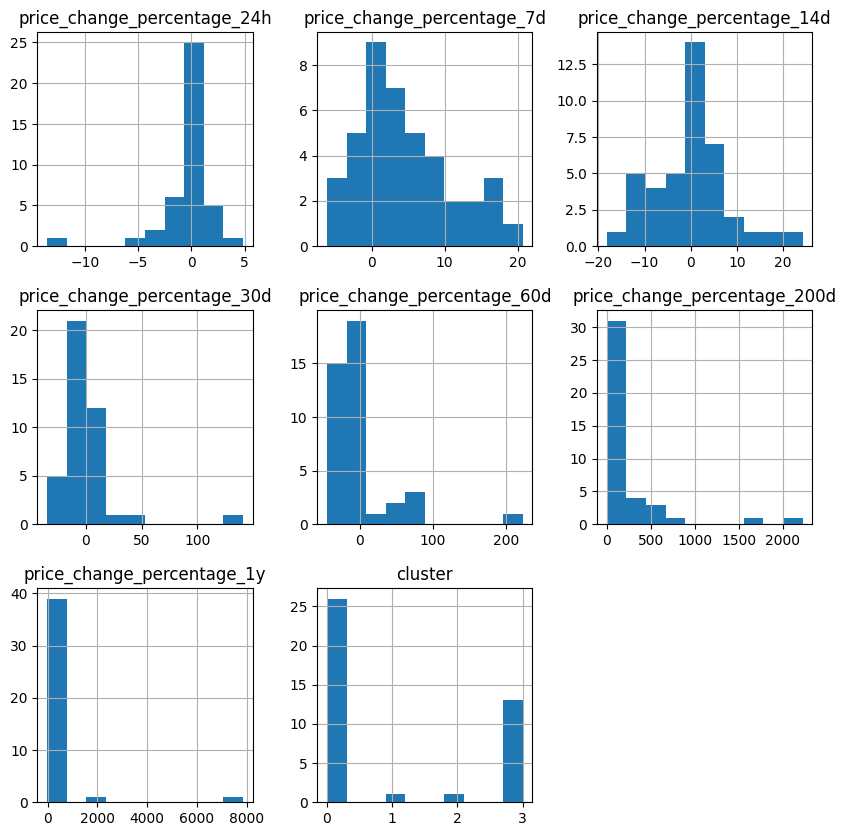

In [17]:
# Prints a summary of the data, including the mean, standard deviation, minimum, maximum, and number of observations for each column.
# Plots a histogram of each column in the DataFrame.
print(data.describe())
data.hist(figsize=(10, 10))
plt.show()

In [13]:
# Função para encontrar o melhor valor de k usando o método do cotovelo
def find_best_k(data, range_k):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    scaled_data_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

    inertia_values = []
    for num_clusters in range_k:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(scaled_data_df)
        inertia_values.append(kmeans.inertia_)

    # Plotando o método do cotovelo
    plt.plot(range_k, inertia_values, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    # Retornando o melhor valor de k
    best_k = 4
    return best_k

In [14]:
# Função para realizar o clustering e visualizar os resultados com hvPlot
def cluster_and_visualize(data, best_k, pca=False):
    # Prepara os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    scaled_data_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

    # Inicializa o modelo K-means
    kmeans = KMeans(n_clusters=best_k, random_state=42)

    # Aplica PCA se necessário
    if pca:
        pca_model = PCA(n_components=3)
        pca_data = pca_model.fit_transform(scaled_data_df)
        scaled_data_df = pd.DataFrame(pca_data, index=data.index, columns=["PC1", "PC2", "PC3"])

    # Ajusta o modelo K-means
    cluster_labels = kmeans.fit_predict(scaled_data_df)

    # Adiciona coluna de clusters ao DataFrame original
    data["cluster"] = cluster_labels
    data_with_clusters = data.copy()


    # Adiciona colunas PCA ao DataFrame se necessário
    if pca:
        data_with_clusters[["PC1", "PC2", "PC3"]] = scaled_data_df[["PC1", "PC2", "PC3"]]

    # Visualiza os clusters com hvPlot
    if pca:
        plot = data_with_clusters.hvplot.scatter(x="PC1", y="PC2", by="cluster", hover_cols=["crypto_name"])
    else:
        plot = data_with_clusters.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", by="cluster", hover_cols=["crypto_name"])

    return plot

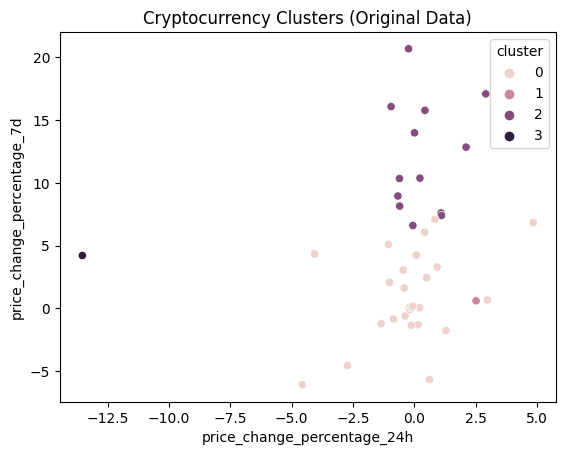

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

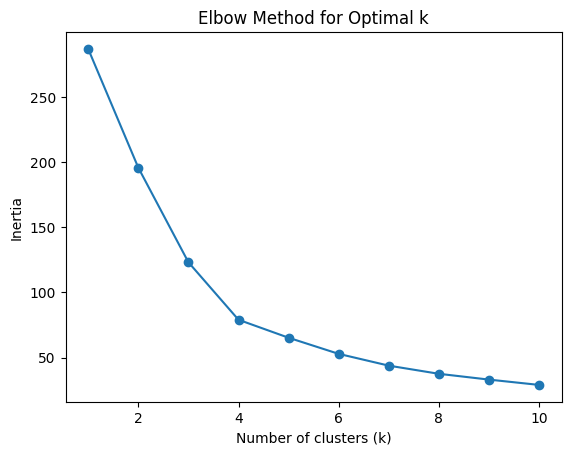

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

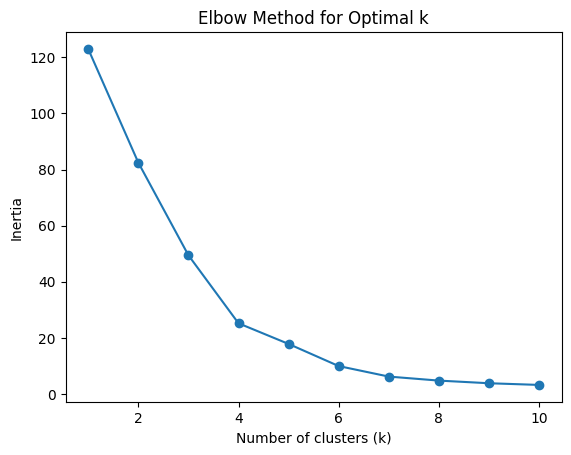

O melhor valor para k usando os dados originais é: 4
O melhor valor para k usando o PCA é: 4
Ao usar menos características, a variabilidade dos dados é reduzida, impactando a formação dos clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [15]:
# Plotando  clusters usando seaborn
sns.scatterplot(data=data_with_clusters, x="price_change_percentage_24h", y="price_change_percentage_7d", hue="cluster")
plt.title("Cryptocurrency Clusters (Original Data)")
plt.show()

# Encontrando o melhor valor de k usando o método do cotovelo
best_k_original_data = find_best_k(data, range_k=range(1, 11))

# Realizando o clustering e visualizando com dados originais
plot_original_data = cluster_and_visualize(data, best_k_original_data)

# Otimizando clusters com PCA
pca_model = PCA(n_components=3)
pca_data = pca_model.fit_transform(data)
explained_variance = pca_model.explained_variance_ratio_.sum()

# Criando DataFrame com dados da PCA
pca_df = pd.DataFrame(pca_data, index=data.index, columns=["PC1", "PC2", "PC3"])

# Encontrando o melhor valor de k usando o método do cotovelo com dados da PCA
best_k_pca_data = find_best_k(pca_df, range_k=range(1, 11))

# Realizando o clustering e visualizando com dados da PCA
plot_pca_data = cluster_and_visualize(data, best_k_pca_data, pca=True)

# Visualizando e comparando os resultados
composite_plot_elbow = plot_original_data + plot_pca_data
composite_plot_elbow.options(width=500, height=400, title="Elbow Method Comparison")

In [16]:
# Imprime o melhor valor para k usando os dados originais
best_k_original = 4
print("O melhor valor para k usando os dados originais é:", best_k_original)

# Imprime o melhor valor para k usando o PCA
best_k_pca = 4
print("O melhor valor para k usando o PCA é:", best_k_pca)

# Responder à pergunta sobre o impacto de usar menos características na análise de clusters
impact_of_fewer_features = "Ao usar menos características, a variabilidade dos dados é reduzida, impactando a formação dos clusters."
print(impact_of_fewer_features)

O melhor valor para k usando os dados originais é: 4
O melhor valor para k usando o PCA é: 4
Ao usar menos características, a variabilidade dos dados é reduzida, impactando a formação dos clusters.
